# Implement the binary classification algorithm for the digits 3 and 4 of MNIST dataset.

### Steps

1. Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the PCA class. When loaded into memory, this dataset appears as an array with shape $ (42000, 785) $, containing the flattened version of $ 42000 \space 28 \times 28 $ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix $ X $ containing the flattened digits, with shape $ (784, 42000) $, and a vector $ Y $ of the associated digit value, with a shape of $ (42000,) $.

2. Write a function taking as input an index value $ idx $ and visualizes the image of $ X $ in the corresponding index (i.e. $ X[idx, :] $). Use the function `plt.imshow`.

3. Filter from $ X $ only those elements that correspond to digits 3 or 4. This can be done, for example, by using the boolean slicing of numpy arrays, as already discussed in class.

4. Split the obtained dataset into training and testing in a proportion of $ 80\%-20\% $. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.

5. Call $ X_1 $ and $ X_2 $ the submatrices of the training set, filtered by the two selected digits, corresponding to those elements associated with number 3 (class $ C_1 $), and with number 4 (class $ C_2 $).

6. Compute the SVD decomposition of $ X_1 $ and $ X_2 $ with `np.linalg.svd(matrix, full_matrices=False)` and denote the $ U $-part of the two decompositions as $ U_1 $ and $ U_2 $.
7.	Take an unknown digit $ x $ from the test set, and compute: $ x_1^{\perp}=U_1(U_1^Tx)$ and $x_2^{\perp}=U_2(U_2^Tx)$
   
8.	Compute the distances $ d_1 = ||x-x_1^{\perp}||_2 $ and $  d_2 = ||x-x_2^{\perp}||_2 $, and classify $ x $ as $ C_1 $ if $ d_1 < d_2 $, as $ C_2 $ if $ d_2 < d_1 $.
9.	Repeat the experiment for different values of $ x $ in the test set. Compute the misclassification rate for this algorithm.
10.	Repeat the experiment for different digits other than 3 or 4. Is there a relationship between the visual similarity of the digits and the classification error?
11.	Comment on the obtained results.

In [3]:
import numpy as np
import pandas as pd

1. Download the MNIST dataset from [kaggle.com/datasets/animatronbot/mnist-digit-recognizer](https://kaggle.com/datasets/animatronbot/mnist-digit-recognizer) and load it into memory by following the steps we did in the PCA class. When loaded into memory, this dataset appears as an array with shape $ (42000, 785) $, containing the flattened version of $ 42000\space 28 \times 28 $ grayscale handwritten digits, plus a column representing the true class of the corresponding digit. By pre-processing the data as we did in class, you should obtain a matrix $ X $ containing the flattened digits, with shape $ (784, 42000) $, and a vector $ Y $ of the associated digit value, with a shape of $ (42000,) $.

In [4]:
data = pd.read_csv('./data/train.csv')

# print first 5 rows
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# print shape
data.shape

(42000, 785)

In [6]:
# converting data into a matrix
data = np.array(data)

# X only contains the pixels for each without the label
# that is in the first column 
X = data[:,1:]
# transpose the matrix to be coherent with the notation
X = X.T

# true values (label) of digits in matrix Y
Y = data[:,0]

print(f"dimension of X is: {X.shape}, and dimension of Y is: {Y.shape}")

dimension of X is: (784, 42000), and dimension of Y is: (42000,)


2. Write a function taking as input an index value $ idx $ and visualizes the image of $ X $ in the corresponding index (i.e. $ X[idx, :] $). Use the function `plt.imshow`.

In [7]:
import matplotlib.pyplot as plt

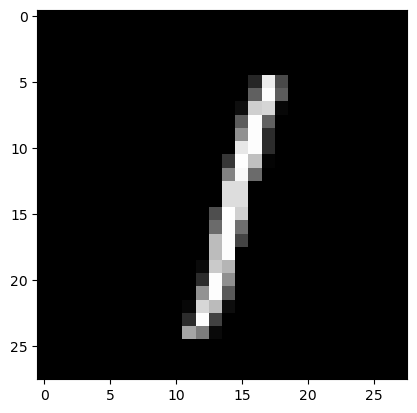

The associated digit is: 1


In [8]:
def show_img(idx, X):
    # first, we take the flattened matrix X and reshape it in a 28x28 pixels image
    # take all the rows of the column 'idx', such that i take all the pixels of the image at index 'idx'
    img = X[:, idx]
    img = np.reshape(img, (28,28))

    plt.imshow(img, cmap='gray')
    plt.show()

# print the 15th image of the dataset
idx = 15
show_img(idx, X)
print(f"The associated digit is: {Y[idx]}")


3. Filter from $ X $ only those elements that correspond to digits 3 or 4. This can be done, for example, by using the boolean slicing of numpy arrays, as already discussed in class.

In [9]:
# filtering only digits corresponding to 3 or 4
def filtering_n1_or_n2(X, Y, n1, n2):
    # creating a mask
    img_filter = (Y==n1) | (Y==n2)

    # take all the images (pixels) corrisponding at the indexes where img_filter is true  
    filter_X = X[:,img_filter]
    filter_Y = Y[img_filter]

    return (filter_X, filter_Y)

filter_X, filter_Y = filtering_n1_or_n2(X,Y, 3, 4)
print(f"The shape of the filtered matrix X is: {filter_X.shape} and the shape of filtered matrix Y is: {filter_Y.shape}")


The shape of the filtered matrix X is: (784, 8423) and the shape of filtered matrix Y is: (8423,)


4. Split the obtained dataset into training and testing in a proportion of $ 80\%-20\% $. From now on, we will only consider the training set. The test set will be only used at the end of the exercise to test the algorithm.

In [10]:
def split_data(X, Y, n_train):    # numbers of images on which work
    N = X.shape[1]
    
    # arrays of numbers
    idx = np.arange(N)
    # shuffle datas in order to have random training and test data
    np.random.shuffle(idx)
    
    # indexes 
    train_idx = idx[:n_train]
    test_idx = idx[n_train:]
    
    # X matrix
    X_train = X[:, train_idx]
    X_test = X[:, test_idx]
    
    # Y matrix
    Y_train = Y[train_idx]
    Y_test = Y[test_idx]
    
    return (X_train, Y_train), (X_test, Y_test)



# 80% of images 
n = int(filter_X.shape[1] * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(filter_X, filter_Y, n)
    
print(X_train.shape, X_test.shape)

(784, 6738) (784, 1685)


5. Call $ X_1 $ and $ X_2 $ the submatrices of the training set, filtered by the two selected digits, corresponding to those elements associated with number 3 (class $ C_1 $), and with number 4 (class $ C_2 $).

In [11]:
def subclasses(n1, n2, X_train, Y_train):
    # dividing the training set in two subsets,
    # containing the images for each number
    X_1 = X_train.T[Y_train == n1]
    X_2 = X_train.T[Y_train == n2]

    # transpose X_1 and X_2
    X_1 = X_1.T
    X_2 = X_2.T
    
    return X_1, X_2


6. Compute the SVD decomposition of $ X_1 $ and $ X_2 $ with `np.linalg.svd(matrix, full_matrices=False)` and denote the $ U $-part of the two decompositions as $ U_1 $ and $ U_2 $.

In [12]:
def SVD_computing(n1, n2, X_train, Y_train):
    X_1, X_2 = subclasses(n1, n2, X_train, Y_train)
    # compute SVD of X_1
    U_1, s_1, VT_1 = np.linalg.svd(X_1, full_matrices=False)
    U_2, s_2, VT_2 = np.linalg.svd(X_2, full_matrices=False)

    return U_1, U_2

7.	Take an unknown digit $ x $ from the test set, and compute: $ x_1^{\perp}=U_1(U_1^Tx)$ and $x_2^{\perp}=U_2(U_2^Tx)$


In [13]:
def x_projection(U_1, U_2, x):
    x_1 = U_1 @ (U_1.T @ x)
    x_2 = U_2 @ (U_2.T @ x)
    return (x_1, x_2)


# select unknown image and its true value
x = X_test[:, 5]
y = Y_test[5]

# SVD on the training set 
U_1, U_2 = SVD_computing(3, 4, X_train, Y_train)

# Data projection 
x_1, x_2 = x_projection(U_1, U_2, x)


8.	Compute the distances $ d_1 = ||x-x_1^{\perp}||_2 $ and $  d_2 = ||x-x_2^{\perp}||_2 $, and classify $ x $ as $ C_1 $ if $ d_1 < d_2 $, as $ C_2 $ if $ d_2 < d_1 $.

In [14]:
def compute_dist(x, x_1, x_2):
    # Compute distance between the real digit
    # and our projection
    d_1 = np.linalg.norm(x-x_1, 2)
    d_2 = np.linalg.norm(x-x_2, 2)
    return d_1, d_2

d_1, d_2 = compute_dist(x, x_1, x_2)

# classification
if(d_1 < d_2):
    print(f"number {y} classified as C_1 (class 3)")
else:
    print(f"number {y} classified as C_2 (class 4)")


number 4 classified as C_2 (class 4)


9.	Repeat the experiment for different values of $ x $ in the test set. Compute the misclassification rate for this algorithm.

In [15]:
def misclassification_error(X_test, Y_test, n1, n2, U_1, U_2):
    MR = 0
    
    # for each image in the X_test
    # compute the misclassification
    for i in range(X_test.shape[1]):
        x = X_test[:, i]
        y = Y_test[i]
        
        x_1, x_2 = x_projection(U_1, U_2, x)
        
        d_1, d_2 = compute_dist(x, x_1, x_2)
        
        if d_1 < d_2 and y == n2:
            MR += 1
        elif d_1 > d_2 and y == n1:
            MR += 1


    n_test = X_test.shape[1]
    error = round((MR/n_test)*100, 2)
    print(f"Out of {n_test} tries, the misclassification error for the digit {n1} and {n2} is {error}%") 
    return error

MR = misclassification_error(X_test, Y_test, 3, 4, U_1, U_2)       

Out of 1685 tries, the misclassification error for the digit 3 and 4 is 7.48%


10.	Repeat the experiment for different digits other than 3 or 4. Is there a relationship between the visual similarity of the digits and the classification error?
11.	Comment on the obtained results.

The relationship between the visual similarity of the digits and the error rate is an interesting aspect. If the chosen digits are visually similar, the error rate will likely be higher, as the algorithm may confuse the digits. For example, digits like 1 and 5 are quite distinct, so we might expect a lower error rate, whereas digits like 3 and 8 might be confused due to their visual similarity, leading to a higher error rate.

Indeed, as we have seen so far comparing the number 3 and 4, as they are visually pretty different, the error rate is quite low (15%-20%).

Let's compute the error rate for these two pairs of number (1,5) and (3,8) and then i will discuss on the results.

In [16]:
def pair(n1,n2):
    # computing filtering for the specific pair
    filter_X, filter_Y = filtering_n1_or_n2(X,Y, n1, n2)

    # computing train and test data
    n = int(filter_X.shape[1] * 0.8)
    (X_train, Y_train), (X_test, Y_test) = split_data(filter_X, filter_Y, n)

    # compute SVD
    U_1, U_2 = SVD_computing(n1, n2, X_train, Y_train)

    # compute misclassification error
    MR = misclassification_error(X_test, Y_test, n1, n2, U_1, U_2)

    return MR
    
def main():
    # different pairs of digits
    MR1 = pair(1,5)
    MR2 = pair(3,8)
    MR3 = pair(3,4)


In [17]:
main()

Out of 1696 tries, the misclassification error for the digit 1 and 5 is 30.9%
Out of 1683 tries, the misclassification error for the digit 3 and 8 is 13.55%
Out of 1685 tries, the misclassification error for the digit 3 and 4 is 3.32%


The extension of this idea to the multiple classification task is trivial. Indeed, if we have more than 2 classes (say, $k$ different classes) $C_1,...,C_k$, we just need to repeat the same procedure as before for each matrix $X_1,...,X_k$ to obtain the distances $d_1,...,d_k$. Then, the new digit $x$  from the test set will be classified as $C_i$ if $d_i$ is lower than $d_j$ for each $j=1,...,k$.

Repeat the exercise above with a 3-digit example. Comment the differences.

In [18]:
# example of 3 digits
n1, n2, n3 = 1, 5, 9

def filtering_n1_or_n2_n3(X, Y, n1, n2, n3):
    img_filter = (Y==n1) | (Y==n2) | (Y==n3)

    filter_X = X[:,img_filter]
    filter_Y = Y[img_filter]

    return (filter_X, filter_Y)

filter_X, filter_Y = filtering_n1_or_n2_n3(X, Y, n1, n2, n3)
(X_train, Y_train), (X_test, Y_test) = split_data(filter_X, filter_Y, int(filter_X.shape[1] * 0.8))

def subclasses(n1, n2, n3, X_train, Y_train):
    X_1 = X_train.T[Y_train == n1]
    X_2 = X_train.T[Y_train == n2]
    X_3 = X_train.T[Y_train == n3]

    # transpose X_1 and X_2
    X_1 = X_1.T
    X_2 = X_2.T
    X_3 = X_3.T
    
    return X_1, X_2, X_3


def SVD_computing(n1, n2, n3, X_train, Y_train):
    X_1, X_2, X_3 = subclasses(n1, n2, n3, X_train, Y_train)

    U_1, s_1, VT_1 = np.linalg.svd(X_1, full_matrices=False)
    U_2, s_2, VT_2 = np.linalg.svd(X_2, full_matrices=False)
    U_3, s_3, VT_3 = np.linalg.svd(X_3, full_matrices=False)

    return U_1, U_2, U_3

def x_projection(U_1, U_2, U_3, x):
    x_1 = U_1 @ (U_1.T @ x)
    x_2 = U_2 @ (U_2.T @ x)
    x_3 = U_3 @ (U_3.T @ x)

    return (x_1, x_2, x_3)

def compute_dist(x, x_1, x_2, x_3):
    d_1 = np.linalg.norm(x-x_1, 2)
    d_2 = np.linalg.norm(x-x_2, 2)
    d_3 = np.linalg.norm(x-x_3, 2)
    return d_1, d_2, d_3

U_1, U_2, U_3 = SVD_computing(n1, n2, n3, X_train, Y_train)

def misclassification_error(X_test, Y_test, n1, n2, n3, U_1, U_2, U_3):
    MR = 0
    for i in range(X_test.shape[1]):
        x = X_test[:, i]
        y = Y_test[i]
        
        x_1, x_2, x_3 = x_projection(U_1, U_2, U_3, x)
        
        d_1, d_2, d_3 = compute_dist(x, x_1, x_2, x_3)
        
        if d_1 < d_2 and d_1 < d_3 and y != n1:
            MR += 1
        elif d_2 < d_1 and d_2 < d_3 and y != n2:
            MR += 1
        elif d_3 < d_1 and d_3 < d_2 and y != n3:
            MR += 1

    n_test = X_test.shape[1]
    print(f"Out of {n_test} tries, the misclassification error for the digit {n1}, {n2} and {n3}, is {round((MR/n_test)*100, 2)}%") 
    return round((MR/n_test)*100, 2)


U_1, U_2, U_3 = SVD_computing(n1, n2, n3, X_train, Y_train)
MR = misclassification_error(X_test, Y_test, n1, n2, n3, U_1, U_2, U_3) 


Out of 2534 tries, the misclassification error for the digit 1, 5 and 9, is 31.77%
